In [1]:
#!pip install fastcluster

In [2]:
import gzip
import pickle
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("../src/")
from convertor import convert
from preprocessing import get_target, preprocessing
from numpy.linalg import norm

In [3]:
plant_list = [
    "A.thaliana",
    "C.sinensis",
    "G.max",
    "G.raimondii",
    "M.truncatula",
    "O.sativa",
    "S.bicolor",
    "T.aestivum",
    "Z.mays"
]

In [4]:
data = []
for plant in plant_list:
    pos = pd.read_csv(f'../experiment/{plant}/positive/Result/result_level1_filter.csv')
    data.append(pos)            
    neg = pd.read_csv(f'../experiment/{plant}/negative/Result/result_level1_filter.csv')
    data.append(neg)            
    
data = pd.concat(data)
data.shape

(62007, 183)

In [5]:
data = convert(data)
[features, mu, std]  = preprocessing(data, None, None, True)

/home/jupyter/Ilia/amir-p3/jupyter_ipynbs/../src/preprocessing.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c].replace([np.inf], m, inplace=True)


In [6]:
corr_matrix = features.corr()

In [26]:
def bi_cluster_sort_arg(corr):
    inp = corr.copy()
    clustergrid = sns.clustermap(inp, cmap='coolwarm', row_cluster=True, col_cluster=True, figsize=(0.01, 0.01), dendrogram_ratio=(0.1, 0.1), cbar_pos=None)
    return clustergrid.dendrogram_row.reordered_ind
bi_cluster_sort_arg(corr_matrix)

[7,
 12,
 51,
 32,
 33,
 50,
 52,
 26,
 25,
 27,
 29,
 28,
 30,
 4,
 8,
 13,
 2,
 9,
 14,
 110,
 183,
 106,
 163,
 124,
 145,
 202,
 104,
 204,
 87,
 160,
 153,
 192,
 191,
 199,
 44,
 45,
 31,
 46,
 159,
 167,
 170,
 19,
 90,
 113,
 181,
 60,
 59,
 61,
 78,
 77,
 79,
 1,
 6,
 11,
 114,
 102,
 185,
 83,
 140,
 88,
 84,
 173,
 208,
 107,
 119,
 196,
 73,
 71,
 72,
 95,
 132,
 125,
 174,
 214,
 109,
 171,
 194,
 164,
 172,
 55,
 53,
 54,
 0,
 3,
 244,
 247,
 307,
 312,
 227,
 232,
 291,
 296,
 300,
 303,
 219,
 224,
 282,
 289,
 253,
 254,
 269,
 270,
 237,
 238,
 274,
 281,
 258,
 265,
 134,
 131,
 150,
 57,
 56,
 58,
 75,
 74,
 76,
 48,
 47,
 49,
 10,
 24,
 283,
 288,
 251,
 256,
 235,
 240,
 275,
 280,
 299,
 304,
 268,
 271,
 243,
 248,
 108,
 169,
 198,
 177,
 123,
 201,
 115,
 186,
 121,
 162,
 100,
 146,
 91,
 118,
 154,
 122,
 148,
 138,
 197,
 96,
 215,
 285,
 286,
 266,
 273,
 218,
 225,
 229,
 230,
 260,
 263,
 290,
 297,
 252,
 255,
 220,
 223,
 267,
 272,
 261,
 262,
 245,
 

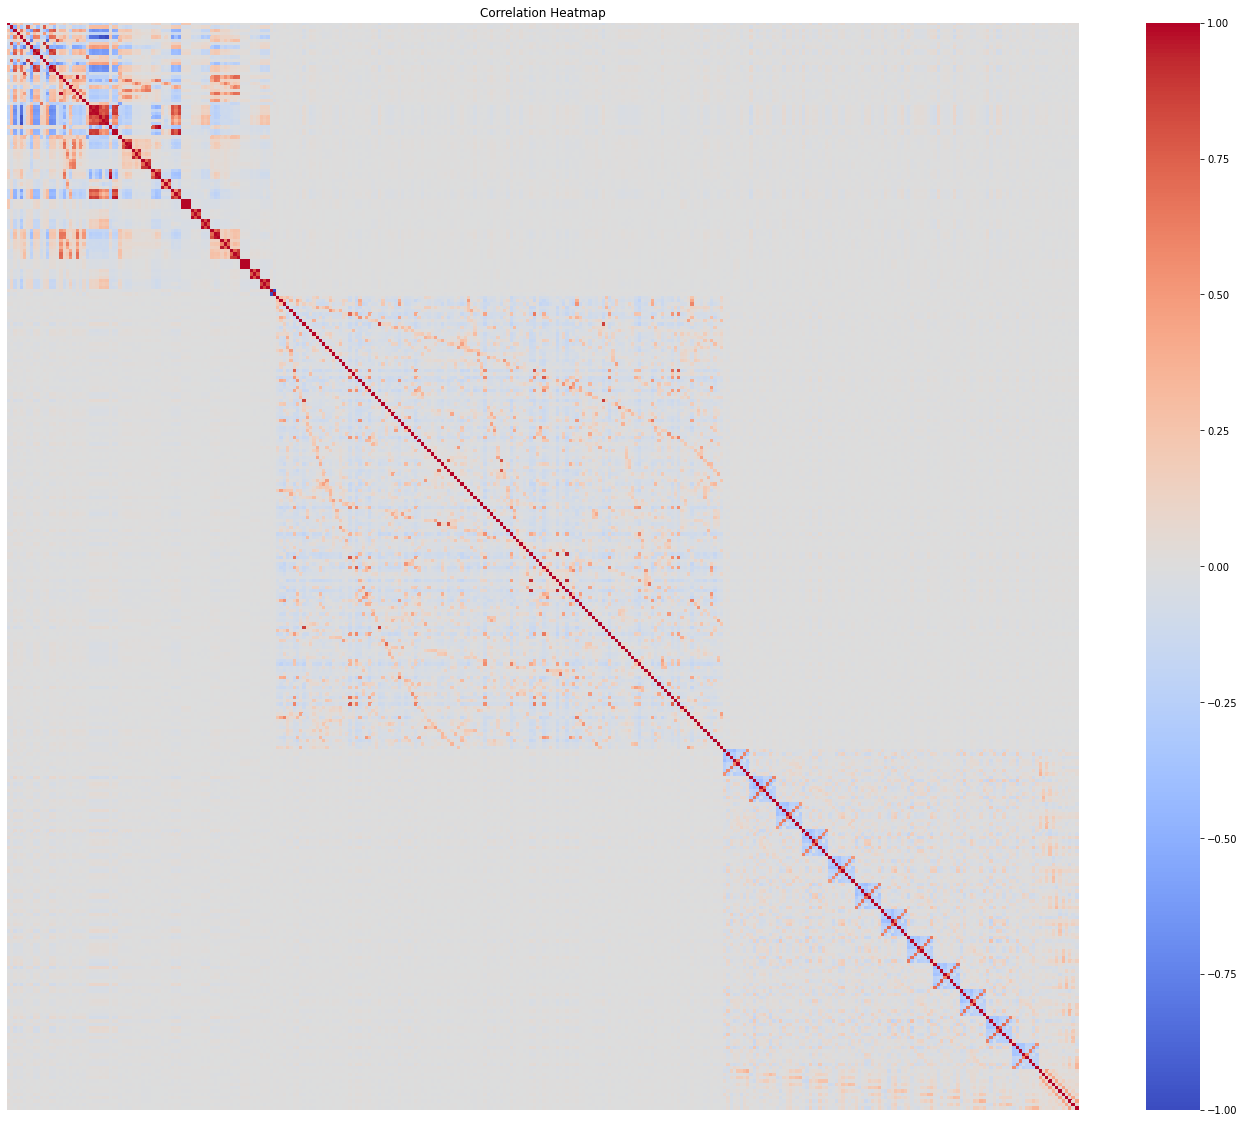

In [22]:
def show_heatmap(corr, title='Correlation Heatmap'):
    plt.figure(figsize=(24, 20))
    sns.heatmap(corr,
                cmap='coolwarm',
                annot=False,
                cbar=True,
                fmt=".2f",
                linewidths=0,
                linecolor='black',
                square=False,
                xticklabels=False,
                yticklabels=False,
                mask=None,
                ax=None,
                center=None,
                vmin=-1,
                vmax=1,
                annot_kws=None,
                cbar_kws=None)

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    #plt.savefig(f"./{title}.svg")

    plt.show()
show_heatmap(corr_matrix)

FloatingPointError: NaN dissimilarity value.

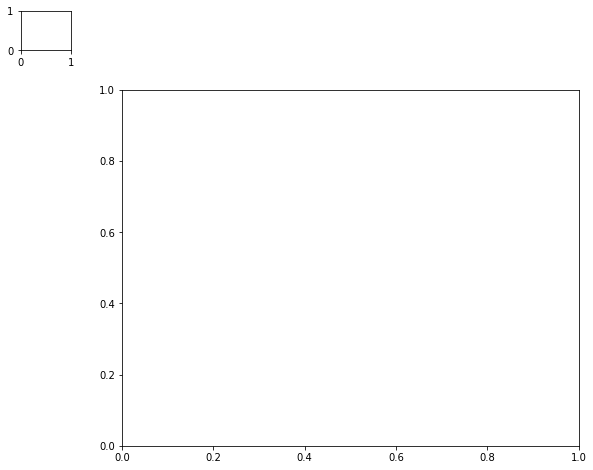

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def show_heatmap(corr, title='Correlation Heatmap', cluster=True):
    if cluster:
        g = sns.clustermap(corr, cmap='coolwarm', annot=False, figsize=(10, 8), dendrogram_ratio=(.1, .1), cbar_pos=(0, .2, .03, .4))
        reordered_corr = corr.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_col.reordered_ind]
    else:
        reordered_corr = corr

    plt.figure(figsize=(10, 8))
    sns.heatmap(reordered_corr,
                cmap='coolwarm',
                annot=False,
                cbar=True,
                fmt=".2f",
                linewidths=0,
                linecolor='black',
                square=False,
                xticklabels=False,
                yticklabels=False,
                mask=None,
                center=None,
                vmin=-1,
                vmax=1,
                annot_kws=None,
                cbar_kws=None)

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

def visualize_correlation_matrices(correlation_matrix, feature_matrix):
    structural_features = feature_matrix.iloc[:,0:80]
    tetranucleotide_features = feature_matrix.iloc[:,80:218]
    connectivity_features = feature_matrix.iloc[:,218:]

    # Without biclustering
    #show_heatmap(correlation_matrix.iloc[0:80, 0:80], title='Correlation Heatmap - Structural features (No Biclustering)', cluster=False)
    #show_heatmap(correlation_matrix.iloc[80:218, 80:218], title='Correlation Heatmap - Tetranucleotide features (No Biclustering)', cluster=False)
    #show_heatmap(correlation_matrix.iloc[218:, 218:], title='Correlation Heatmap - Connectivity features (No Biclustering)', cluster=False)
    #show_heatmap(correlation_matrix, title='Correlation Heatmap - All features (No Biclustering)', cluster=False)

    # With biclustering
    #show_heatmap(structural_features.corr(), title='Correlation Heatmap - Structural features (Biclustering)', cluster=True)
    #show_heatmap(tetranucleotide_features.corr(), title='Correlation Heatmap - Tetranucleotide features (Biclustering)', cluster=True)
    #show_heatmap(connectivity_features.corr(), title='Correlation Heatmap - Connectivity features (Biclustering)', cluster=True)
    
    # Biclustering on combined areas
    combined_corr = pd.concat([structural_features.corr(), tetranucleotide_features.corr(), connectivity_features.corr()], axis=1)
    combined_corr = pd.concat([combined_corr, combined_corr.T], axis=1)  # Ensure symmetry
    show_heatmap(combined_corr, title='Correlation Heatmap - All features (Biclustering Combined)', cluster=True)

# Assuming you have a DataFrame called 'features' containing your features
corr_matrix = features.corr()
visualize_correlation_matrices(corr_matrix, features)


/home/emadi/.local/lib/python3.8/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(**tight_params)


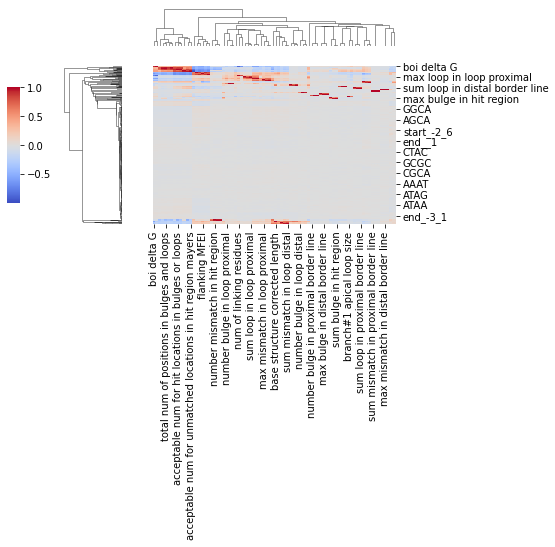

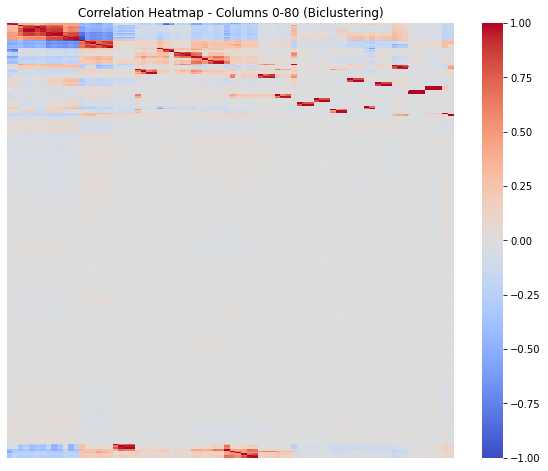

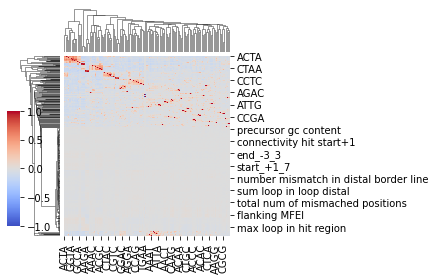

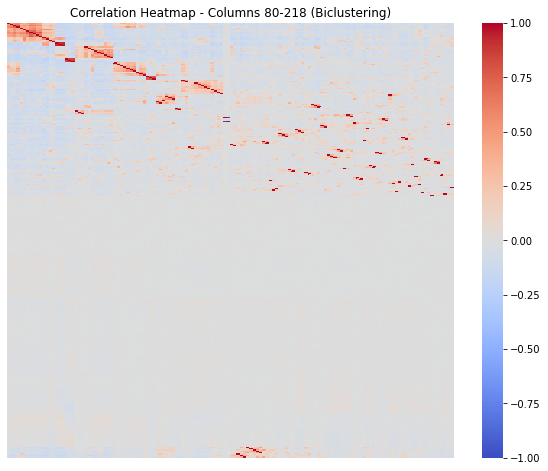

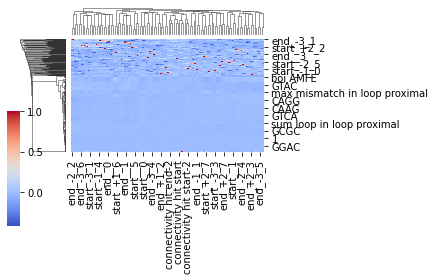

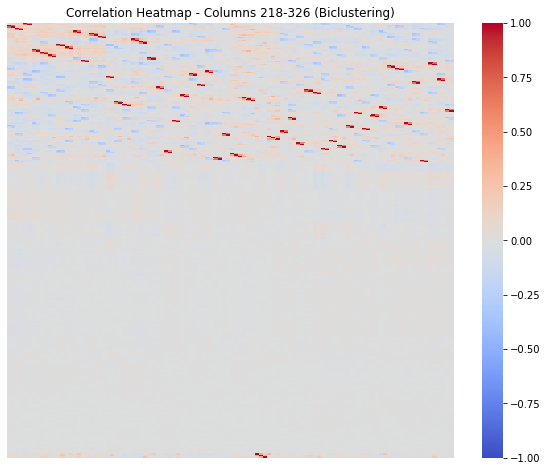

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def show_heatmap(corr, title='Correlation Heatmap'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr,
                cmap='coolwarm',
                annot=False,
                cbar=True,
                fmt=".2f",
                linewidths=0,
                linecolor='black',
                square=False,
                xticklabels=False,
                yticklabels=False,
                mask=None,
                center=None,
                vmin=-1,
                vmax=1,
                annot_kws=None,
                cbar_kws=None)

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

def perform_biclustering(corr):
    # Define column ranges
    ranges = [(0, 80), (80, 218), (218, corr.shape[1])]

    # Perform biclustering on each range separately
    for start, end in ranges:
        corr_subset = corr.iloc[:, start:end]
        g = sns.clustermap(corr_subset, cmap='coolwarm', annot=False, figsize=(6, 4), dendrogram_ratio=(.2, .2), cbar_pos=(0, .2, .03, .4))
        reordered_corr_subset = corr_subset.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_col.reordered_ind]
        show_heatmap(reordered_corr_subset, title=f'Correlation Heatmap - Columns {start}-{end} (Biclustering)')

# Assuming you have a correlation matrix named 'corr'
perform_biclustering(features.corr())


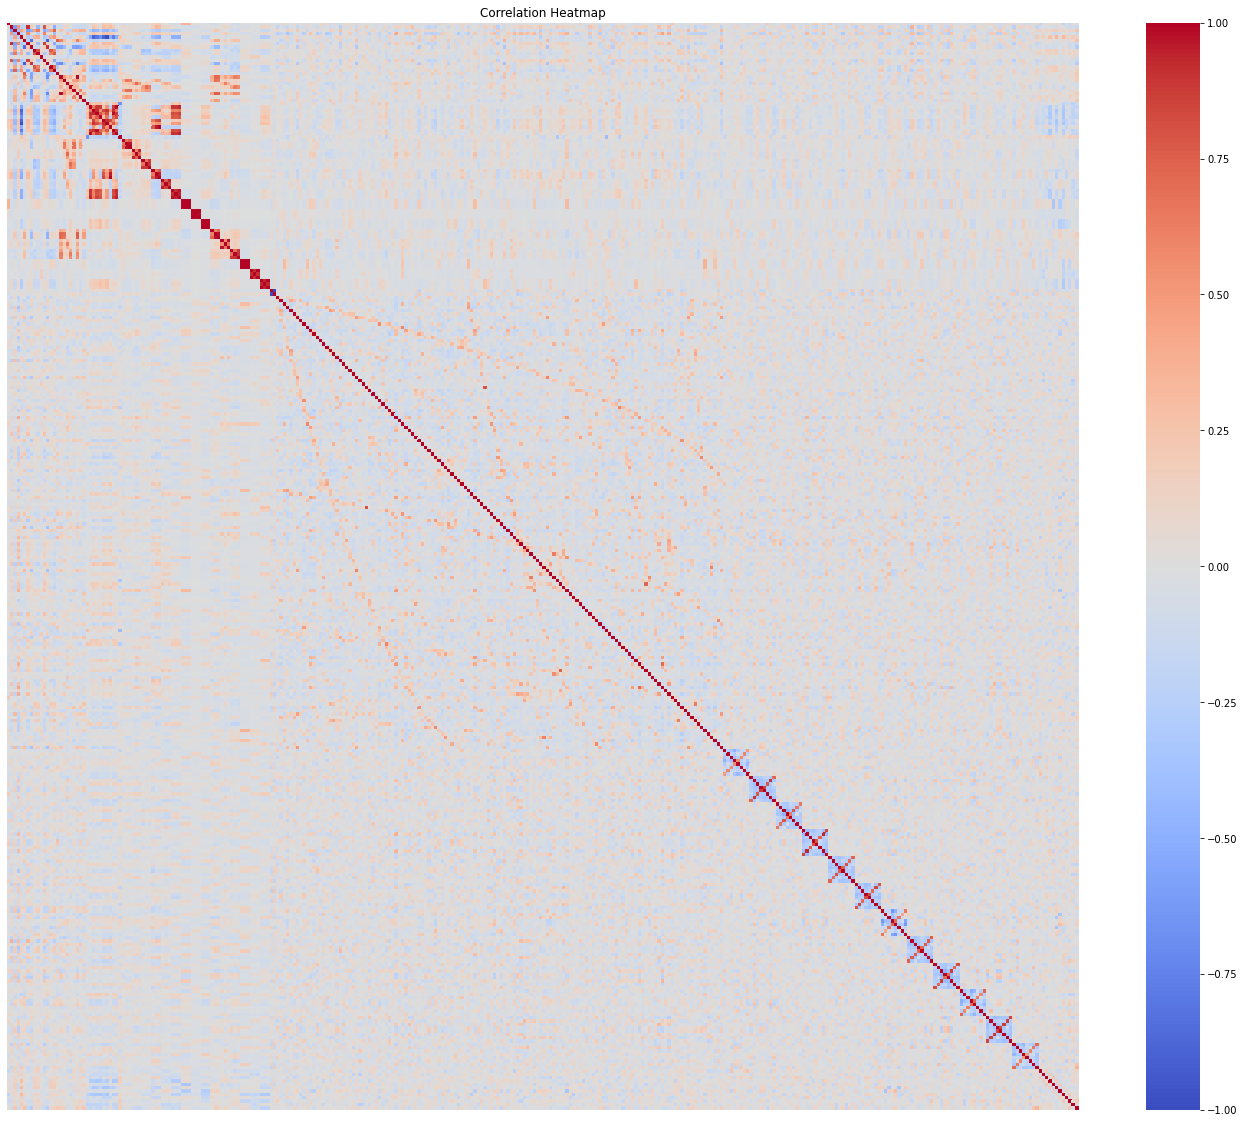

In [7]:
# Plot heatmap
show_heatmap(corr_matrix)

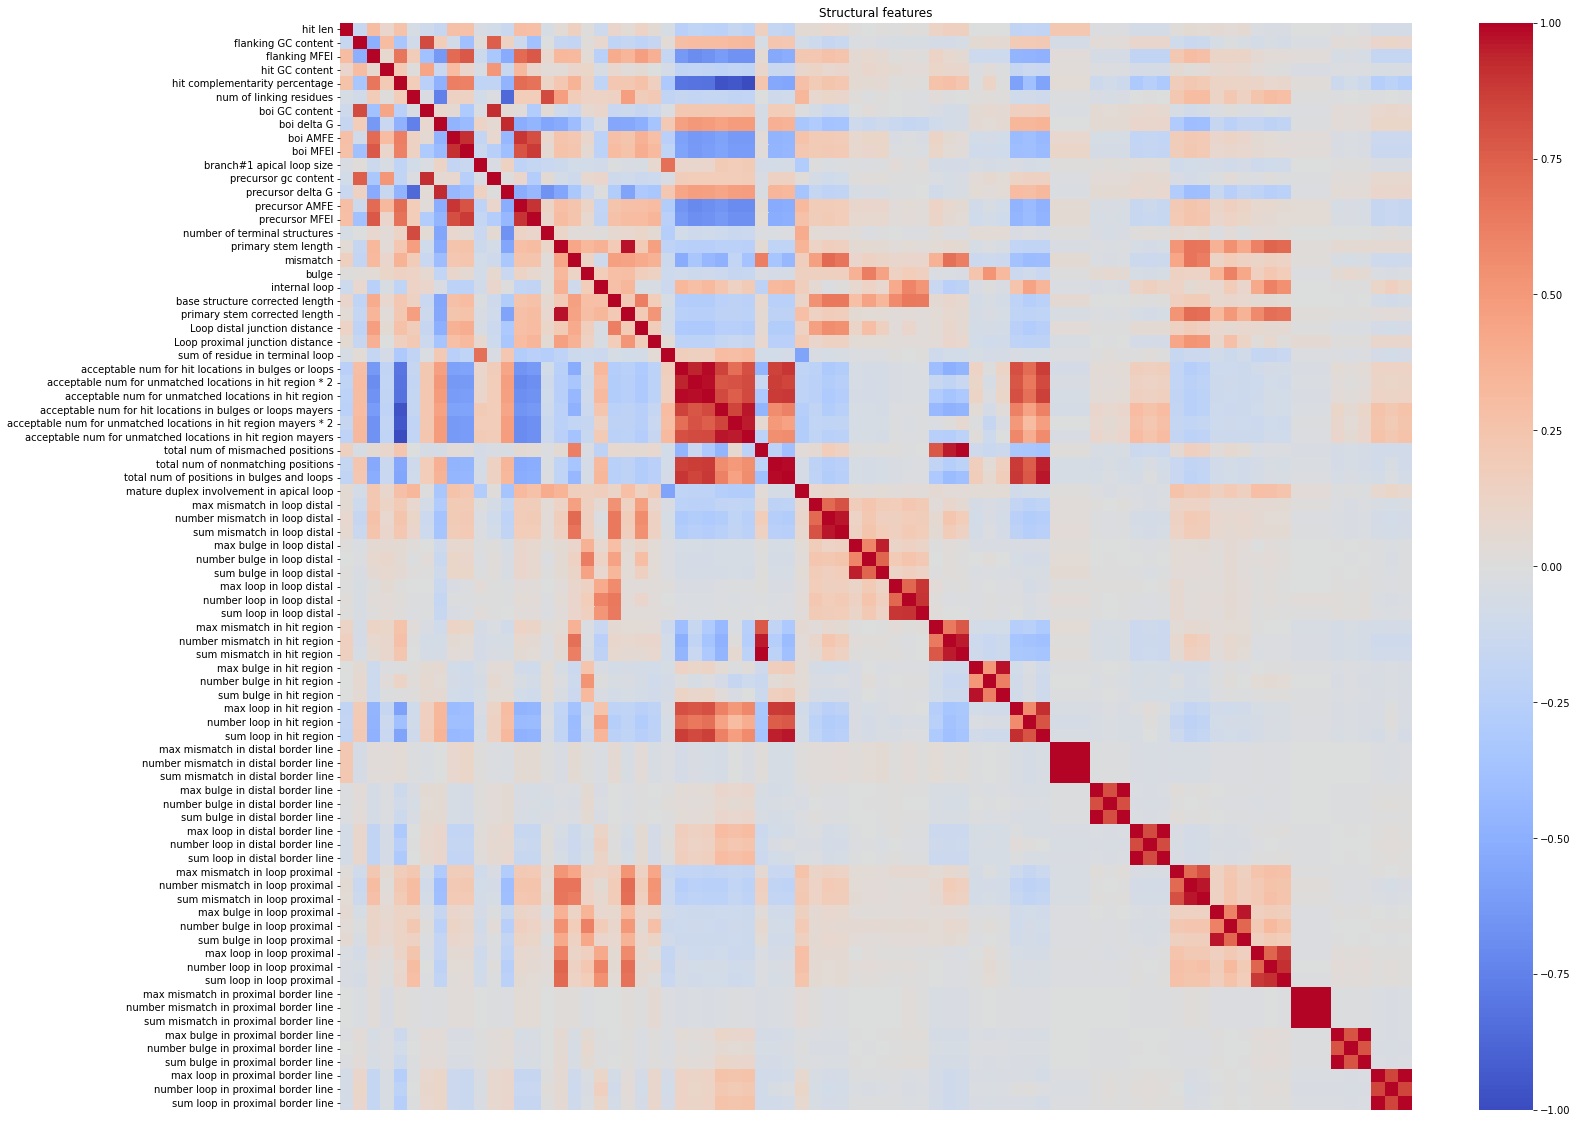

In [74]:
# Plot heatmap
temp = corr_matrix.copy()
show_heatmap(temp.iloc[0:80,0:80], "Structural features")

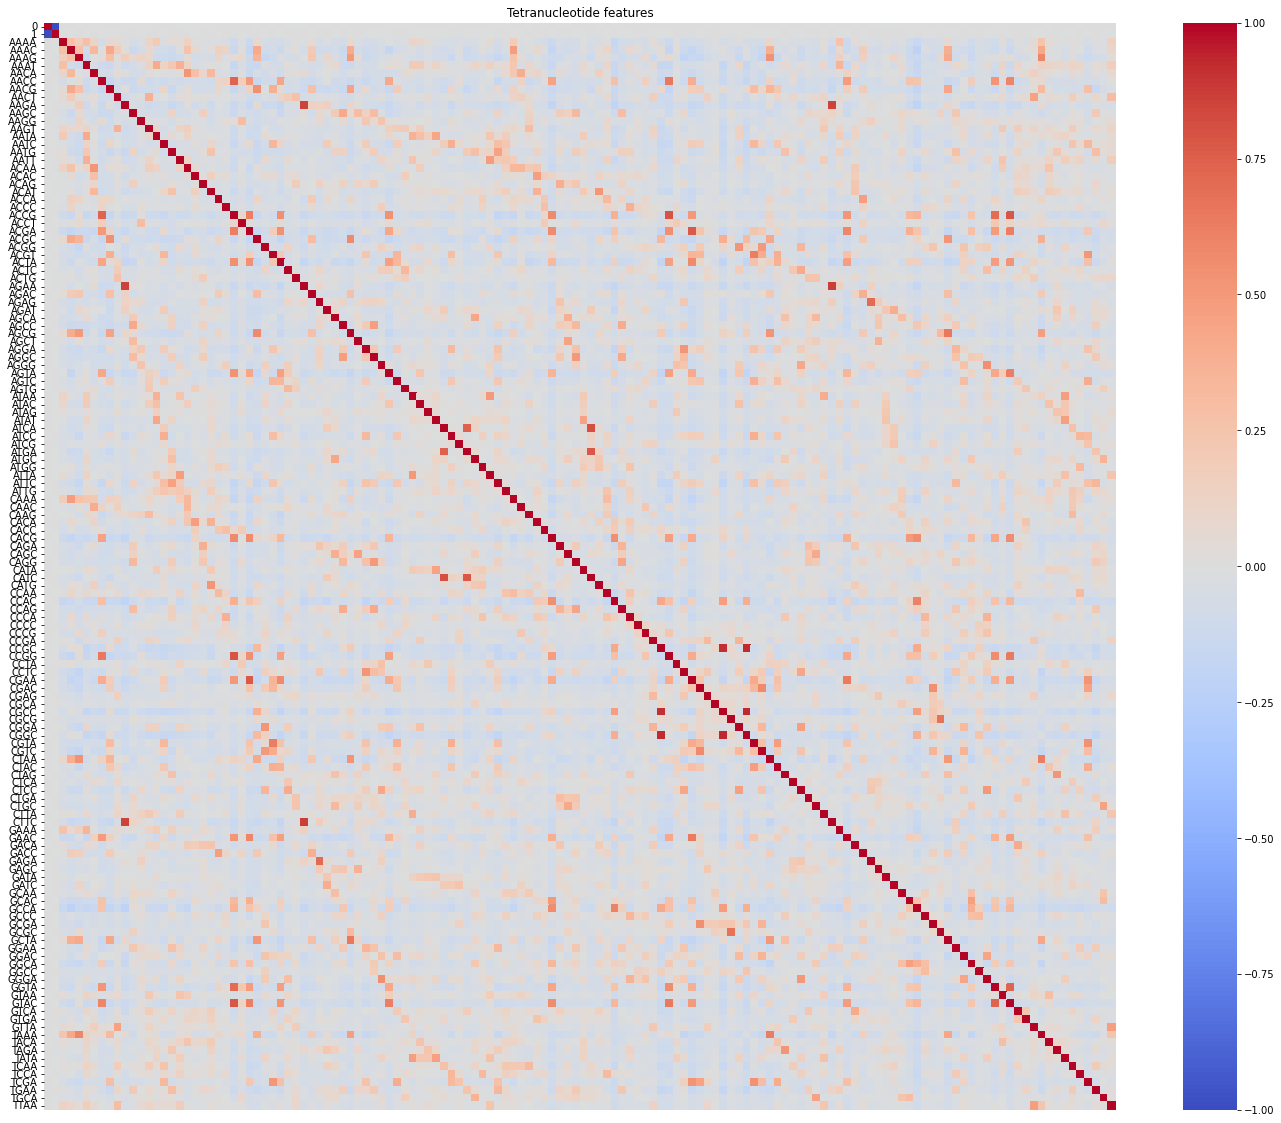

In [79]:
# Plot heatmap
temp = corr_matrix.copy()
show_heatmap(temp.iloc[80:218,80:218], "Tetranucleotide features")

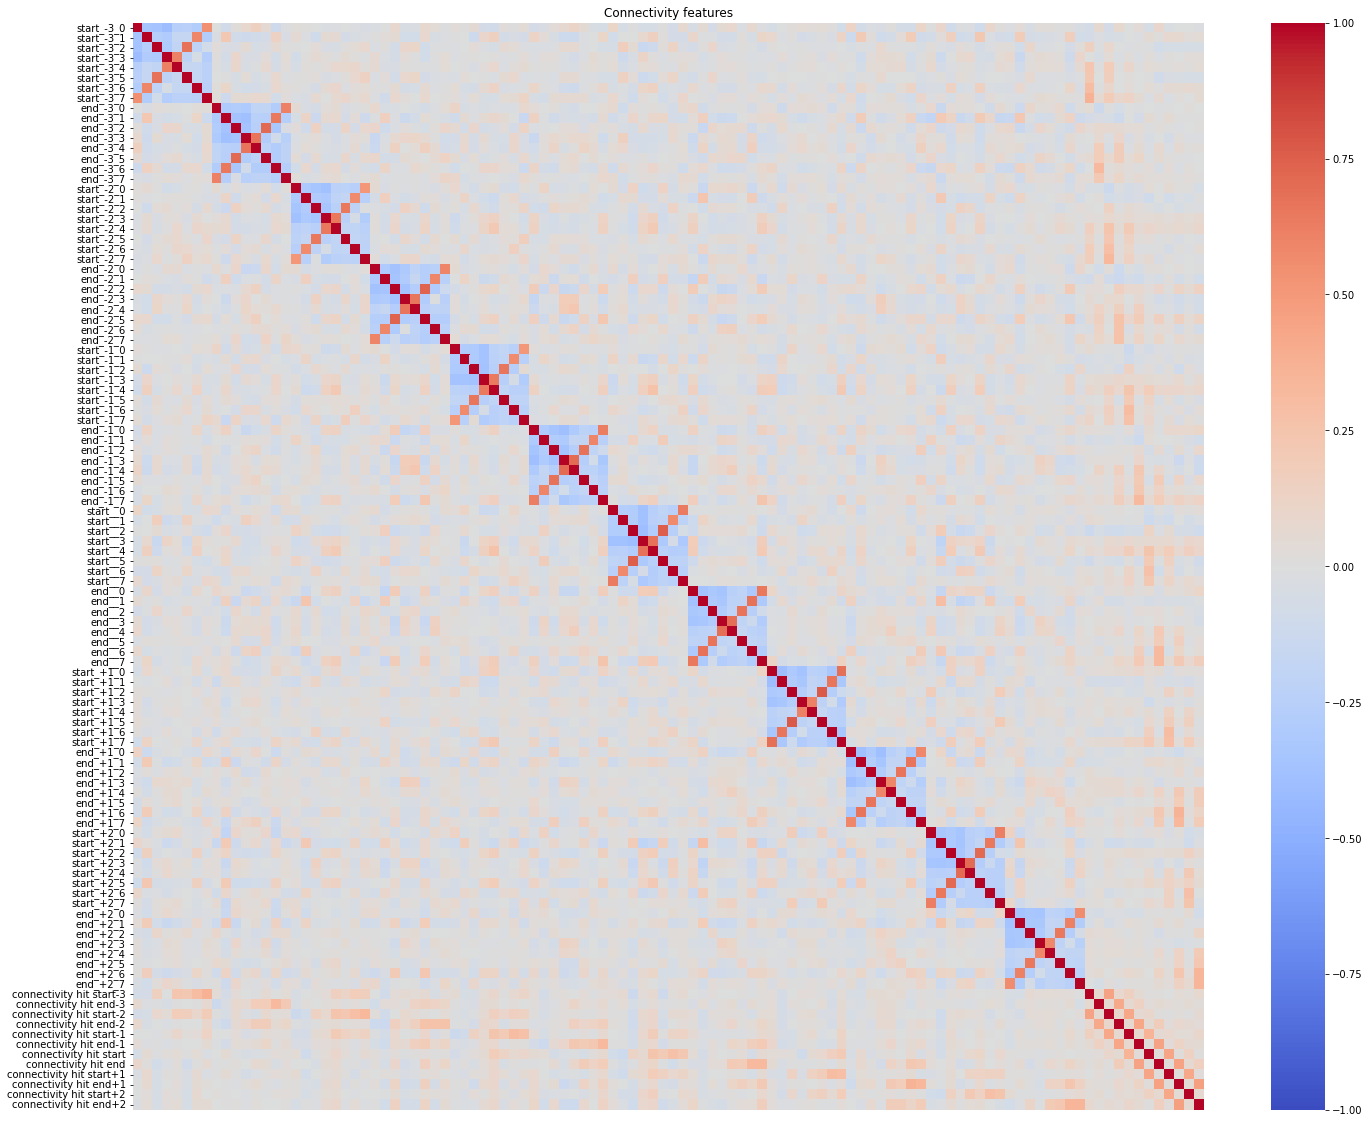

In [84]:
# Plot heatmap
temp = corr_matrix.copy()
show_heatmap(temp.iloc[218:,218:], "Connectivity features")

In [86]:
for c in corr_matrix.iloc[:, 218:].columns:
    print(c)
    break

start_-3_0


In [ ]:
0:80 => [1, 80]
80:218 => [81, 218]